# Week 1 Jupyter Notebook - Linear Regression part 1. 

## Polynomial and Interaction Terms 


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


## Load The Dataset

In [2]:
# Load the dataset
df = pd.read_csv('dataset_phishin.csv')

# Preview
df.head()


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [4]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [4]:
df = pd.read_csv("dataset_phishin.csv")
df = df.dropna()

# Map target variable from string to numeric
df['status'] = df['status'].map({'phishing': 1, 'legitimate': 0})

# Define features and target
features = ['length_url', 'nb_dots', 'nb_slash', 'domain_age', 'web_traffic']
X = df[features]
y = df['status']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





## Polynomail Regression

In [5]:
poly_only = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
X_poly_train_full = poly_only.fit_transform(X_train)
X_poly_test_full = poly_only.transform(X_test)

poly_feature_names = poly_only.get_feature_names_out(X.columns)
squared_indices = [i for i, name in enumerate(poly_feature_names) if "^2" in name or name in X.columns]
X_poly_train_sq = X_poly_train_full[:, squared_indices]
X_poly_test_sq = X_poly_test_full[:, squared_indices]

lr_poly = LinearRegression()
lr_poly.fit(X_poly_train_sq, y_train)
y_pred_poly = lr_poly.predict(X_poly_test_sq)

r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print("Polynomial Terms Only")
print("R²:", round(r2_poly, 3))
print("RMSE:", round(rmse_poly, 3))

Polynomial Terms Only
R²: 0.213
RMSE: 0.443


# Interaction Term

In [7]:


#  INTERACTION TERMS
poly_inter = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_inter_train = poly_inter.fit_transform(X_train)
X_inter_test = poly_inter.transform(X_test)

lr_inter = LinearRegression()
lr_inter.fit(X_inter_train, y_train)
y_pred_inter = lr_inter.predict(X_inter_test)

r2_inter = r2_score(y_test, y_pred_inter)
rmse_inter = np.sqrt(mean_squared_error(y_test, y_pred_inter))

print("Interaction Terms Only")
print("R²:", round(r2_inter, 3))
print("RMSE:", round(rmse_inter, 3))




Interaction Terms Only
R²: 0.248
RMSE: 0.434


# Visualization 

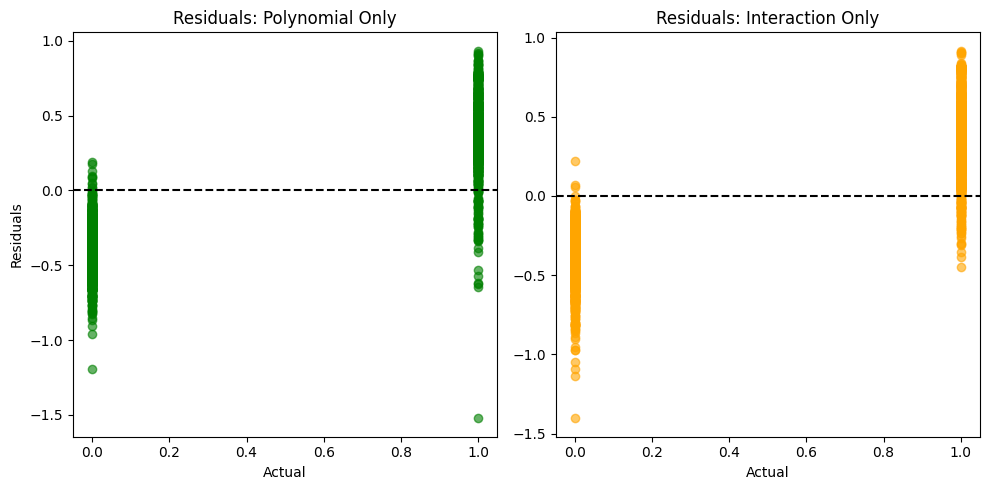

In [8]:
# Residual Plot for Both Models
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test - y_pred_poly, color="green", alpha=0.6)
plt.axhline(0, linestyle='--', color='black')
plt.title("Residuals: Polynomial Only")
plt.xlabel("Actual")
plt.ylabel("Residuals")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test - y_pred_inter, color="orange", alpha=0.6)
plt.axhline(0, linestyle='--', color='black')
plt.title("Residuals: Interaction Only")
plt.xlabel("Actual")

plt.tight_layout()
plt.show()

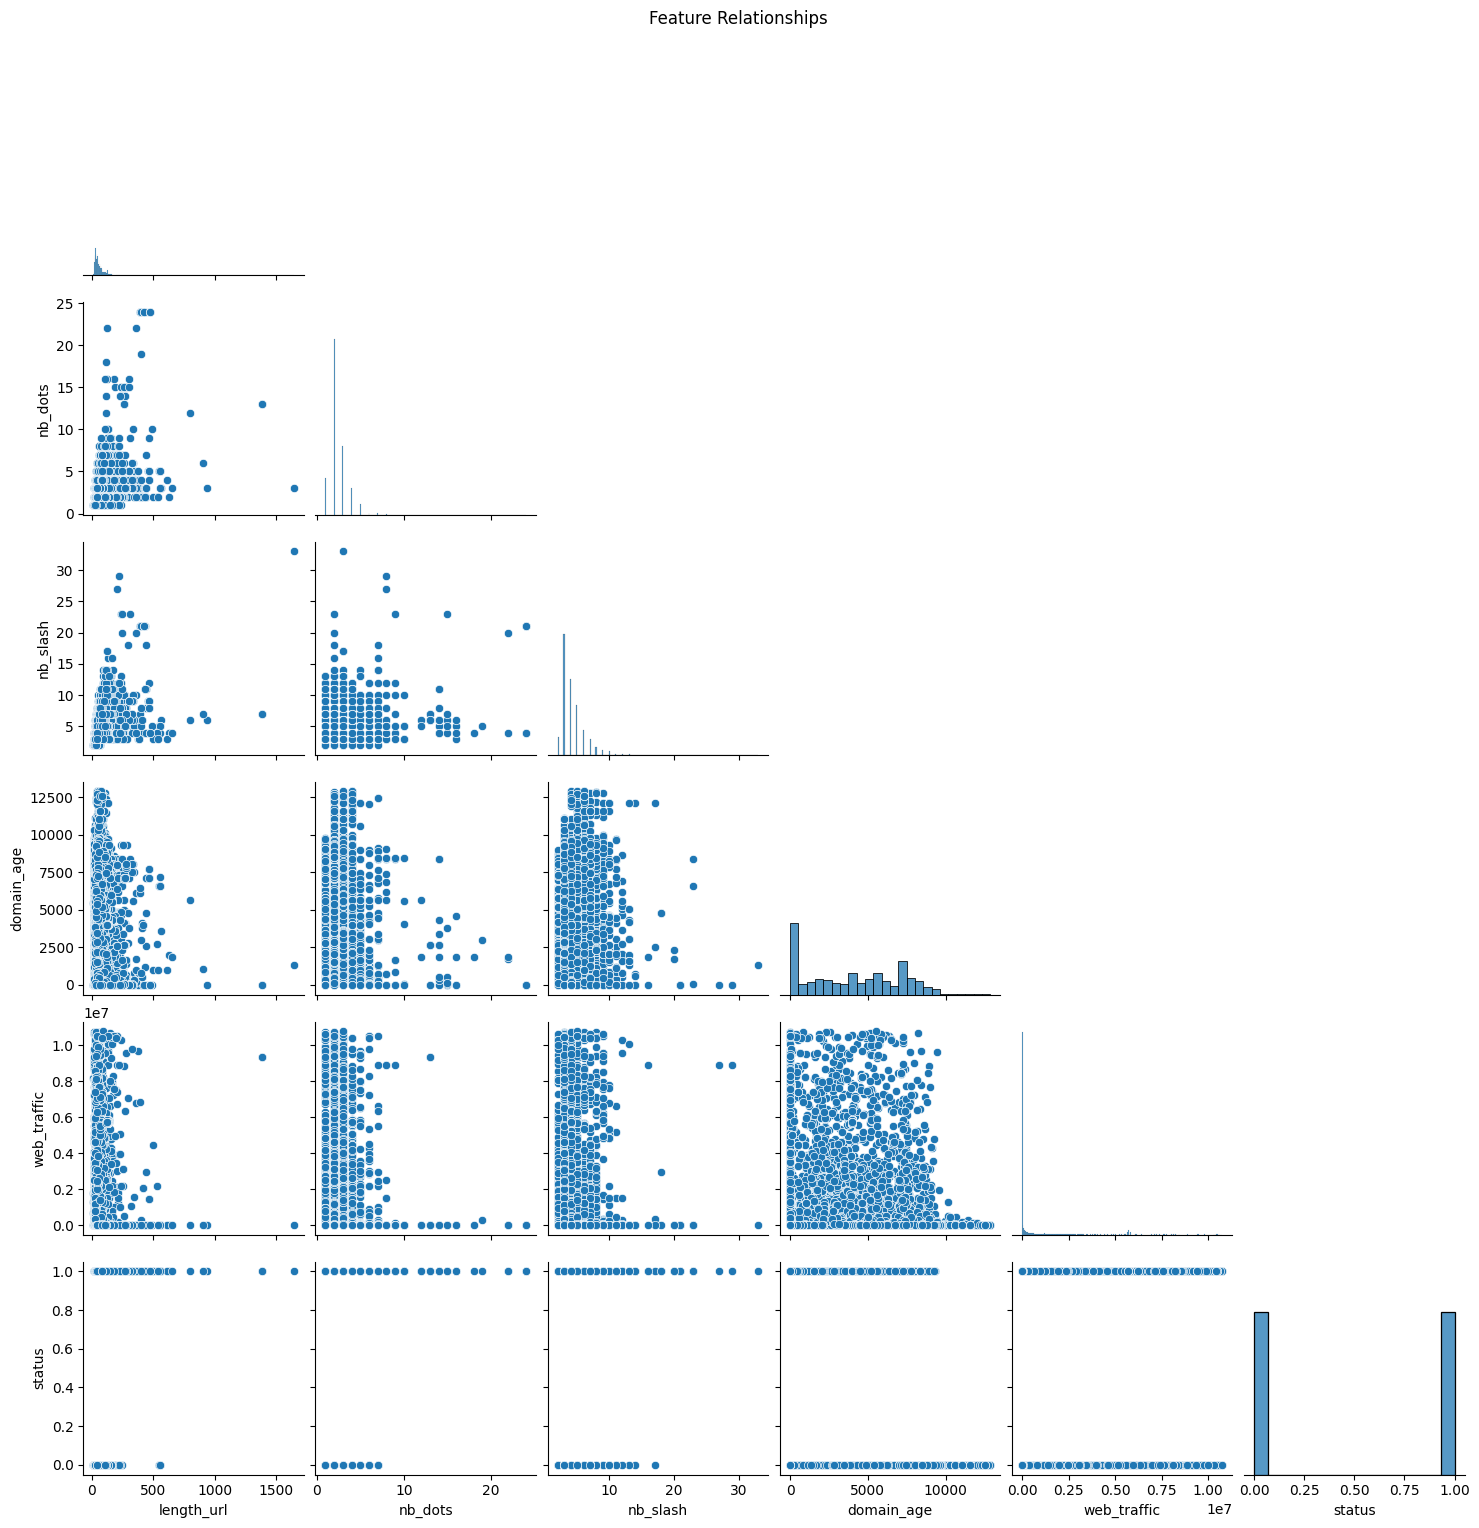

In [9]:
import seaborn as sns

sns.pairplot(df[features + ['status']], corner=True)
plt.suptitle("Feature Relationships", y=1.02)
plt.show()


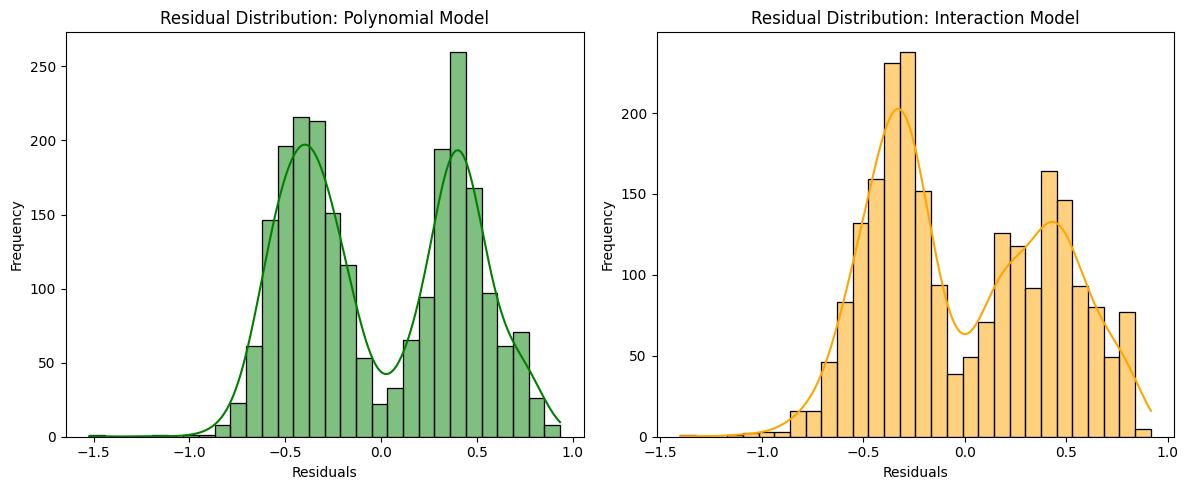

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate residuals
residuals_poly = y_test - y_pred_poly
residuals_inter = y_test - y_pred_inter

# Plot side-by-side residual distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(residuals_poly, bins=30, kde=True, color='green')
plt.title("Residual Distribution: Polynomial Model")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(residuals_inter, bins=30, kde=True, color='orange')
plt.title("Residual Distribution: Interaction Model")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In Week 1 of the capstone project, the focus was on exploring the impact of polynomial and interaction terms in linear regression using the phishing dataset. Five features were selected for modeling: length_url, nb_dots, nb_slash, domain_age, and web_traffic. The target variable, status, originally categorical, was mapped to numeric form (1 for phishing, 0 for legitimate) to support regression modeling. The first included only polynomial terms—original features and their squared versions—while the second model included only pairwise interaction terms. The polynomial model achieved an R² of 0.213 and an RMSE of 0.443, while the interaction-only model slightly outperformed it with an R² of 0.248 and an RMSE of 0.434.

To complement the model evaluation, several visualizations were used. A Seaborn pairplot provided insight into feature relationships, highlighting potential multicollinearity or nonlinear trends. Residual plots for both models showed residuals centered around zero with no clear pattern, suggesting the models fit the data reasonably well and did not violate assumptions of linearity. Additionally, side-by-side distribution plots of the residuals showed that the interaction model had a slightly tighter spread, supporting its marginally better performance. 